In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

## Prepare Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


## Create Model

In [3]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

## Compile Model

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

## Train Model

In [6]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5233 - accuracy: 0.9378
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4818 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4766 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4751 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4730 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4740 - accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4751 - accuracy: 0.9807
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4734 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4738 - accuracy: 0.9822
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.476

## Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

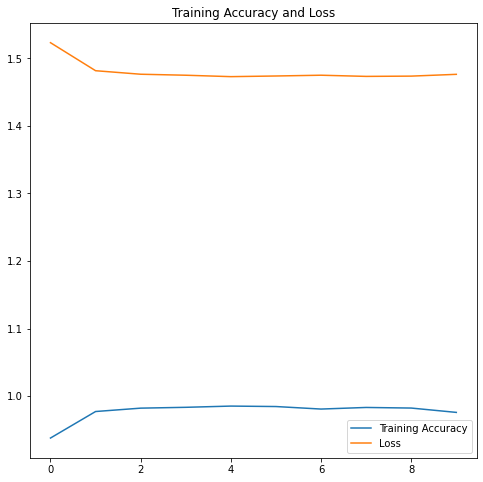

In [7]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')


## Test Image

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Prediction of model: 0


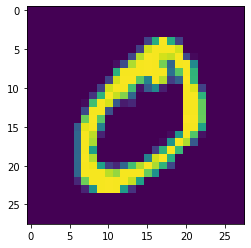

In [8]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 4


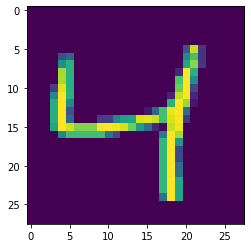

In [9]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

## Test Multiple Image

Test images array shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


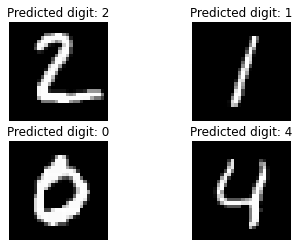

In [10]:

images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


## Save Model

In [11]:
model.save("tf-cnn-model.h5")

## Load Model

In [12]:
loaded_model = models.load_model("tf-cnn-model.h5")

Prediction of model: 4


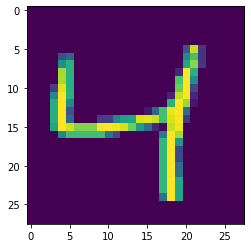

In [13]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = loaded_model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))